In [3]:
# # get textst from VK by vk api
# import matplotlib.pyplot as plt
# import pandas as pd
# import vk_requests
# import time
# import random
# import seaborn as sns


# class MyLoader():

#     def __init__(self):
#         self.numIterations = 30
#         token = '57506d6430f9b05657f724126d7eb556c63d11b8921b1ef88dac93236e9cf58361ffa5fff65e822669001'
#         self.api = vk_requests.create_api(service_token=token)
#         self.classes = {
#             'educational': ['mirea_official', 'hse.lectorium', 'msucareer', 'bmstu1830', 'miptfpmi', 'finuniver_kf', 'nust_misis', 'gubkin.university', 'mephi_official', 'kgu_kaluga'],
#             'other': ['kylinar_vk', 'kinopoisk', 'anecdotes', 'overhear', 'palatka_tru', 'ribalka2017', 'airsoft_rus', 'club13704425', 'f.recept', 'klgshest']
#         }

#     def loadDf(self, path):
#         df = pd.read_csv(path)
#         df = dropEmptyStrings(df)
#         return df

#     def getDf(self):
#         delay = [0.34, 0.44, 0.4, 0.43, 0.5]
#         step = 100
#         self.educational = []
#         self.other = []
#         counter = 1
#         # get walls info
#         for key, value in self.classes.items():
#             shift = 0
#             buffer = []
#             counter = 1
#             for domain in value:
#                 print(f'{key}: {counter}/{len(value)}')
#                 counter += 1
#                 for i in range(self.numIterations):
#                     temp = self.api.wall.get(
#                         domain=domain, count=step, offset=shift)
#                     time.sleep(random.choice(delay))
#                     shift += step
#                     buffer.extend(temp['items'])
#             if key == 'educational':
#                 self.educational.append(buffer)
#             elif key == 'other':
#                 self.other.append(buffer)

#         educationalText = []
#         textLen = []
#         for post in self.educational[0]:
#             educationalText.append(post['text'])
#             textLen.append(len(post['text']))

#         otherText = []
#         for post in self.other[0]:
#             otherText.append(post['text'])
#             textLen.append(len(post['text']))

#         labelsEdu = ['educational' for i in range(len(educationalText))]
#         labelsOther = ['other' for i in range(len(otherText))]

#         # create dataframe
#         d = {'category': labelsEdu+labelsOther,
#              'length': textLen, 'text': educationalText+otherText}
#         df = pd.DataFrame(data=d)
#         df = dropEmptyStrings(df)
#         return df


# def dropEmptyStrings(df):
#     df = df[df['length'] > 0]
#     return df


# def showGist(df):
#     # plt.hist(df['length'], color = 'blue', edgecolor = 'black', bins = int(180/10))
#     # plt.title('Распределение длины постов')
#     # #plt.xlim(1000)
#     # plt.show()
#     sns.histplot(data=df, x='length', hue='category')
#     plt.title('Распределение длины постов')
#     plt.xlim(0, 5000)
#     plt.show()
        

In [ ]:
# ml = MyLoader()
# df = ml.getDf()

In [64]:
# df.to_csv('data\\vkgroups.csv')

In [1]:
'''ЗАГРУЗКА ДАННЫХ'''
from model import*
from dataclass import splitDf
from loader import*

ml = MyLoader()
df = ml.loadDf('..\data\\vkgroups2.csv')
#df = ml.getDf()

print(torch.cuda.get_device_name(0))


NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
#df.to_csv('..\data\\vkgroups2.csv')

In [2]:
len(df)

34019

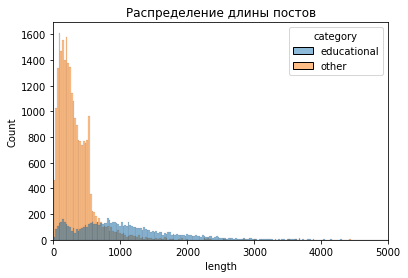

In [2]:
'''ПРОСМОТР ДАННЫХ'''
showGist(df)

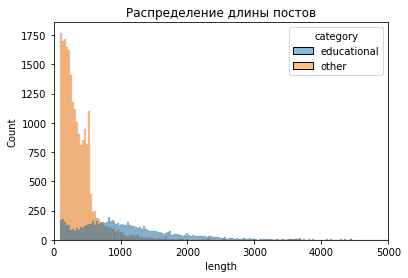

In [6]:
from copy import deepcopy
df2 = deepcopy(df)
df2 = df2[df2['length'] > 100]
showGist(df2)

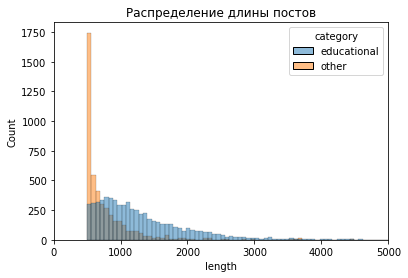

In [7]:
df2 = df2[df2['length'] > 500]
showGist(df2)

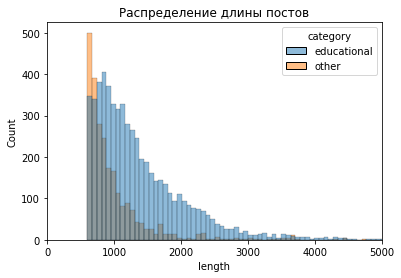

In [8]:
df2 = df2[df2['length'] > 600]
showGist(df2)

In [9]:
len(df2)

8232

In [6]:
'''В результате я решил обучать BERT на данных, представленных на диаграмме выше, потому что они более равномерно распределены по длине'''
df = df[df['length'] > 600]

df_train, df_val, df_test = splitDf(df)
print(len(df_train), len(df_val), len(df_test))

6585 823 824


In [3]:
EPOCHS = 1
model = BertClassifier()
LR = 1e-6

model.train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1647/1647 [06:09<00:00,  4.45it/s]


Epochs: 1 | Train Loss:  0.038                     | Train Accuracy:  0.944                     | Val Loss:  0.005                     | Val Accuracy:  0.998


In [4]:
torch.save(model,'../model_ru_withgrads.pth')

In [7]:
model_test = torch.load('../model_ru_withgrads.pth')

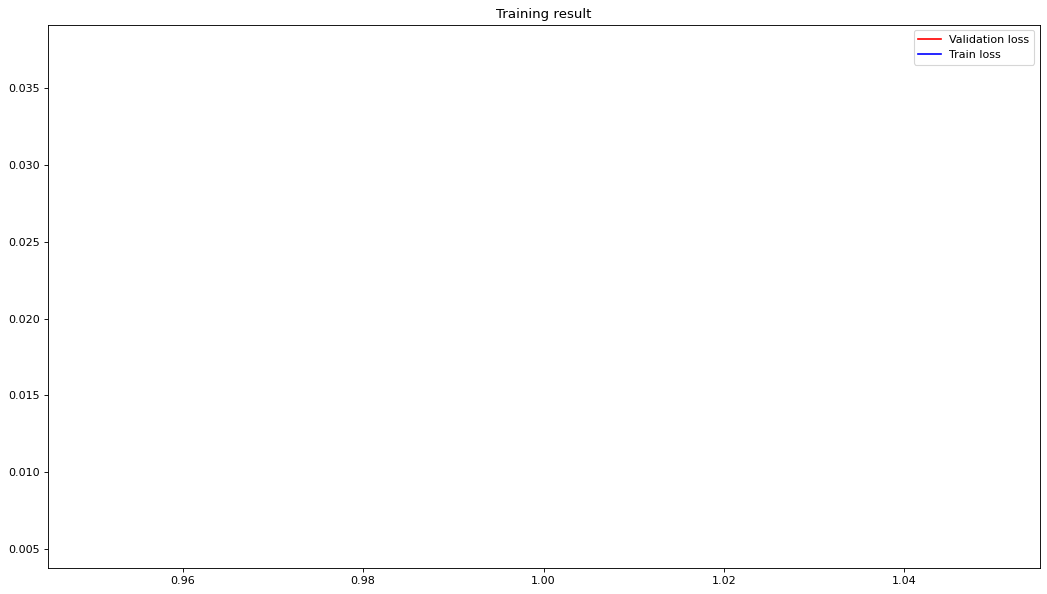

In [6]:
from model import*
model_test.showTrainingResult()

In [11]:
type(model_test)

model.BertClassifier

In [8]:
#model_test.eval()
evaluate(model_test, df_test)

Test Accuracy:  0.999


In [6]:
checkInput(model_test)

Чтобы завершить введите 0
Профессор технических наук
Hmm, let me see... It is: educational
Уха - это суп из рыбы
Oh, i'm pretty sure that it is: other
Карпов Даниил Денисович
Hmm, let me see... It is: other
Кошка
Oh, i'm pretty sure that it is: educational
Искуственный интеллект
Oh, i'm pretty sure that it is: other
Искусственный интелект
Hmm, let me see... It is: educational
BERT
Oh, i'm pretty sure that it is: educational
BERT
Hmm, let me see... It is: educational


KeyboardInterrupt: Interrupted by user

In [17]:
ml.educational[0][0]['text']

'Один из самых передовых технологических вузов страны — такое место сегодня занимает РТУ МИРЭА.\n\nСтуденты РТУ МИРЭА готовы менять мир к лучшему и учатся работать на самых современных системах.\n \nРебята изучают среды виртуальной реальности, цифровое роботизированное производство, иммерсивные технологии и технологии захвата движения, мобильную робототехнику, самую современную радиоэлектронику, передовые направления \nхимии и биотехнологии.\n\nВсе знания и навыки студенты оттачивают на практике, ведь РТУ МИРЭА — это десятки собственных лабораторий и мегалабораторий, более 40 базовых кафедр и свыше 300 предприятий-партнёров, на которых узнаваемы и востребованы выпускники нашего вуза. \n\nРебята рассказали, что им нравится в РТУ МИРЭА и почему они выбрали именно его. \n\nПодробности — в видео.\n\nОзвучил: Сергей Бурунов.\n\n#rtumirea'